# Stationarity and Autocorrelation 

#### 1. Import Libraries and Dataframe

#### 2. Clean Data

#### 3. Create Lineplots of Life Expectancy, Labor Force Participation Rate, HDI

#### 4. Decomposing Data and Testimg for Stationarity

#### 5. Stationarizing Data

#### 6. Dickey Fuller Test (Differencing the Data)

#### 7. Autocorrelation

## Import Libaries

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

## Open Dataset

In [2]:
df=pd.read_csv(r'C:\Users\Jason\OneDrive\Documents\Achievement 6\Human Development Data\HumanDevData.csv')

#### Subset of Dataset (United States 1990-2020)

In [3]:
df_1990_2020 = df.loc[(df['Country'] == 'United States') & ((df['Year'] >= 1990) & (df['Year'] <= 2020))]

I decided to do 1990 to 2020 because these are the 30 most recent years on the dataset. I considered 2000 to 2020, but I thought that using only the most recent 20 years would be too little.

## Clean Data

#### Missing Values

In [4]:
df_missing_values=df_1990_2020.isnull().sum()
print(df_missing_values)

Country                                                         0
Key Var                                                         0
Year                                                            0
Expected Years of Schooling                                     0
Gender Dev Index (Gender Inequality)                            0
Gross National Income Per Capita                                0
Human Development Index                                         0
Labour force participation rate, female % ages 15 and older)    0
Life Expectancy                                                 0
Maternal Mortality Ratio (deaths per 100,000 live births)       0
dtype: int64


#### Check Duplicates

In [5]:
duplicates=df_1990_2020[df_1990_2020.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Country, Key Var, Year, Expected Years of Schooling, Gender Dev Index (Gender Inequality), Gross National Income Per Capita, Human Development Index, Labour force participation rate, female % ages 15 and older), Life Expectancy, Maternal Mortality Ratio (deaths per 100,000 live births)]
Index: []


In [6]:
### Drop Columnns
df_1990_2020.drop(columns='Key Var',inplace=True)

#### Check Headings

In [7]:
df_1990_2020.head(10)

,Country,Year,Expected Years of Schooling,Gender Dev Index (Gender Inequality),Gross National Income Per Capita,Human Development Index,"Labour force participation rate, female % ages 15 and older)",Life Expectancy,"Maternal Mortality Ratio (deaths per 100,000 live births)"
1011,United States,1990,7.841860,0.987,39472.30210,0.872,56.539,75.3699,11.0
1181,United States,1991,8.153502,0.988,38997.77919,0.873,56.428,75.5227,11.0
1350,United States,1992,8.465145,0.988,39677.08666,0.878,56.942,75.7776,11.0
1520,United States,1993,8.776787,0.987,40069.43868,0.880,57.058,75.5670,11.0
1688,United States,1994,9.088430,0.988,41280.44005,0.884,57.946,75.7377,12.0
1856,United States,1995,9.400072,0.989,42183.13373,0.885,58.142,75.8536,12.0
2025,United States,1996,9.711715,0.987,43533.95344,0.887,58.443,76.1753,12.0
2193,United States,1997,10.023358,0.988,45256.99435,0.890,58.983,76.4980,11.0
2360,United States,1998,10.335000,0.991,47253.20126,0.893,58.937,76.6600,11.0
2527,United States,1999,10.678515,0.990,48806.13219,0.889,59.112,76.6718,12.0


In [8]:
from datetime import datetime

# Assuming df_1990_2020 is your DataFrame containing the 'Year' column

# Convert 'Year' to datetime
df_1990_2020['Year'] = pd.to_datetime(df_1990_2020['Year'], format='%Y')

# Set 'Year' as the index
df_1990_2020.set_index('Year', inplace=True)

print(df_1990_2020.head()) 

                  Country  Expected Years of Schooling  \
Year                                                     
1990-01-01  United States                     7.841860   
1991-01-01  United States                     8.153502   
1992-01-01  United States                     8.465145   
1993-01-01  United States                     8.776787   
1994-01-01  United States                     9.088430   

            Gender Dev Index (Gender Inequality)  \
Year                                               
1990-01-01                                 0.987   
1991-01-01                                 0.988   
1992-01-01                                 0.988   
1993-01-01                                 0.987   
1994-01-01                                 0.988   

            Gross National Income Per Capita  Human Development Index  \
Year                                                                    
1990-01-01                       39472.30210                    0.872   
1991-01-0

## Create Lineplots

#### Create Lineplot of Data, US 2000-2020 Life Expectancy

<Axes: xlabel='Year', ylabel='Life Expectancy'>

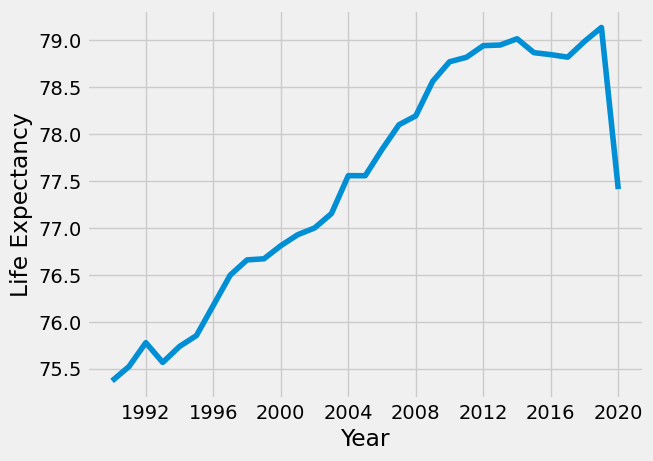

In [9]:
sns.lineplot(data=df_1990_2020, x='Year', y='Life Expectancy')

#### Create Lineplot of Data, US 1990-2020 Human Development Index (Scale from 0-1)

<Axes: xlabel='Year', ylabel='Human Development Index'>

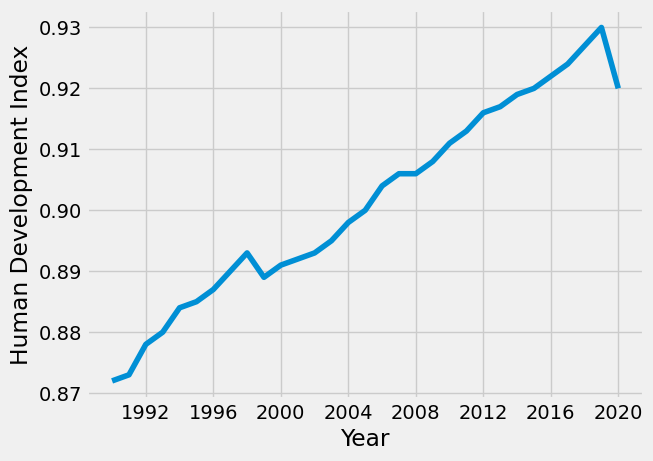

In [10]:
sns.lineplot(data=df_1990_2020, x='Year', y='Human Development Index')

Text(0.5, 1.0, 'Labor Force Participation Rate (Females 15 and Older)')

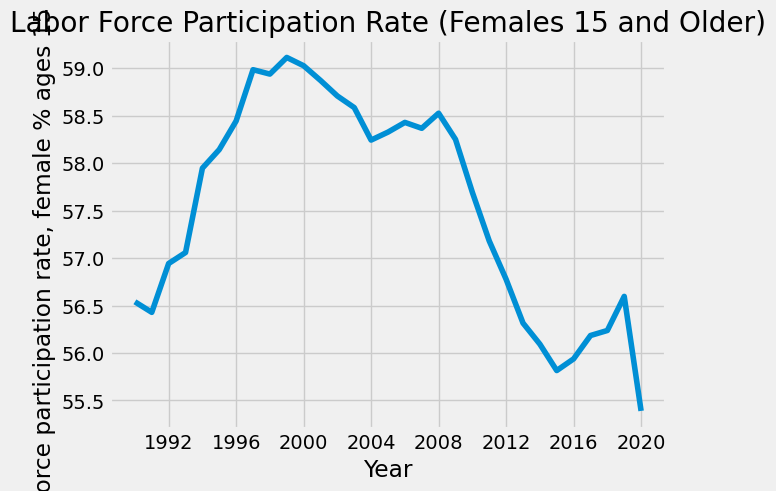

In [11]:
sns.lineplot(data=df_1990_2020, x='Year', y='Labour force participation rate, female % ages 15 and older)')
plt.title('Labor Force Participation Rate (Females 15 and Older)')

## Decompose the Human Development Data for Labor Force Participation Rate

In [12]:
## Additive Decomposition to See If Data Is Stationary or Non Stationary
decomp=sm.tsa.seasonal_decompose(df_1990_2020['Labour force participation rate, female % ages 15 and older)'], model='additive')

In [13]:
from pylab import rcParams 

rcParams['figure.figsize']=18,7

#### Plot Decomposition

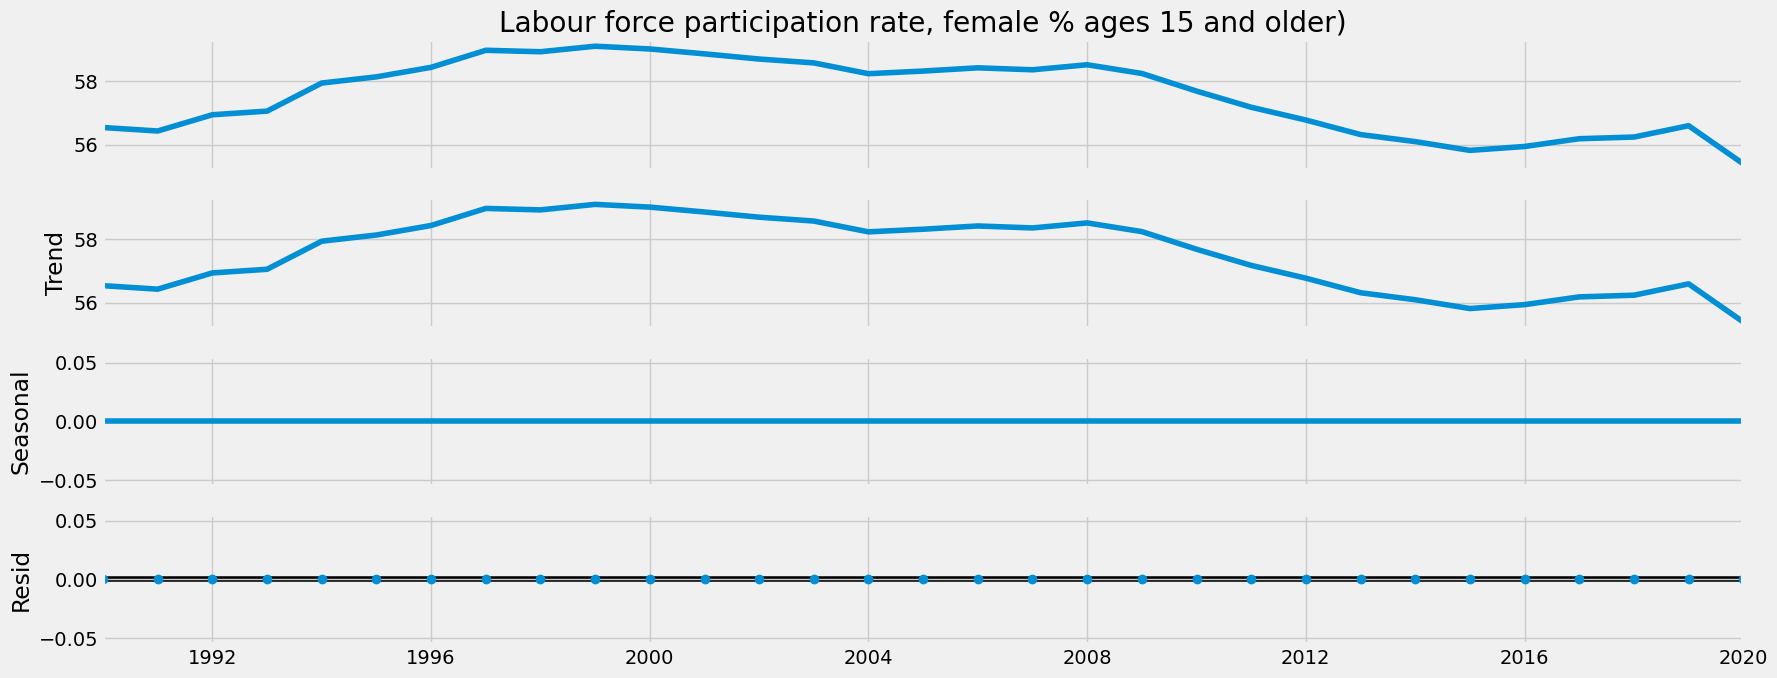

In [14]:
decomp.plot()
plt.show()

## Test for Stationarity

In [15]:
#### Run Adfuller Defined as Dickey Fuller to Test Stationarity
from statsmodels.tsa.stattools import adfuller

## Define AdFuller as Dickey Fuller test
def dickey_fuller(timeseries):
    #### Do the Test
    print('Dickey Fuller Test of Stationarity')
    test=adfuller(timeseries, autolag='AIC')
    result=pd.Series(test[0:4], index=['Test Statistic', 'p value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)' % key]=value
    print(result)

## Apply Test
dickey_fuller(df_1990_2020['Labour force participation rate, female % ages 15 and older)'])

Dickey Fuller Test of Stationarity
Test Statistic                 -0.161446
p value                         0.942964
Number of Lags Used             0.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
Critical Value (10%)           -2.621171
dtype: float64


The data here is non stationary because the Test Statistic is greater than the Critical Value at 95% confidence. 

## Stationarizing the Data

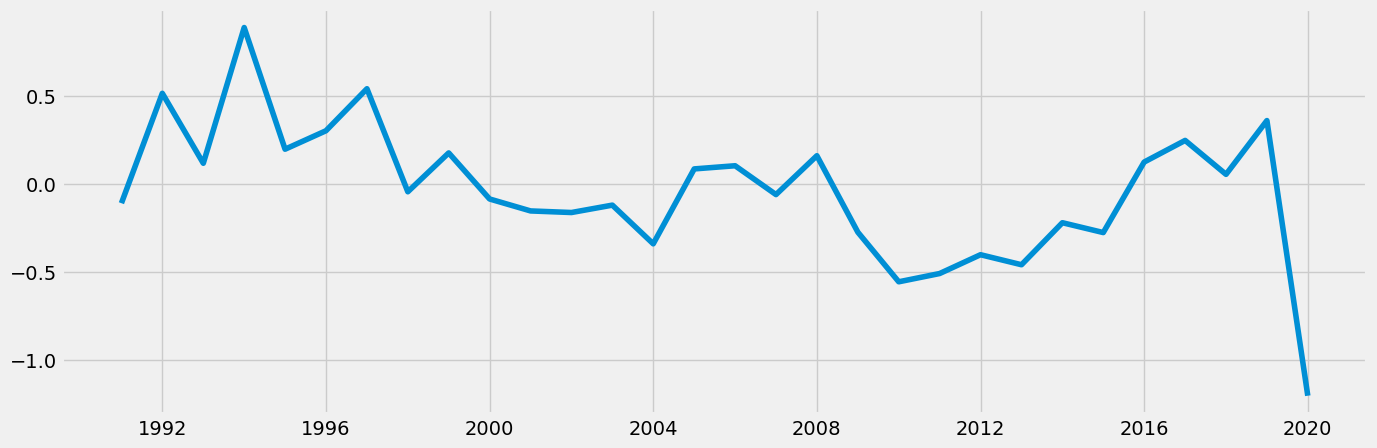

In [16]:
## Stationarize the Data
data_differencing=df_1990_2020['Labour force participation rate, female % ages 15 and older)']-df_1990_2020['Labour force participation rate, female % ages 15 and older)'].shift(1)  ## t-(t-1)

## Plot the Stationarizing Process
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_differencing)

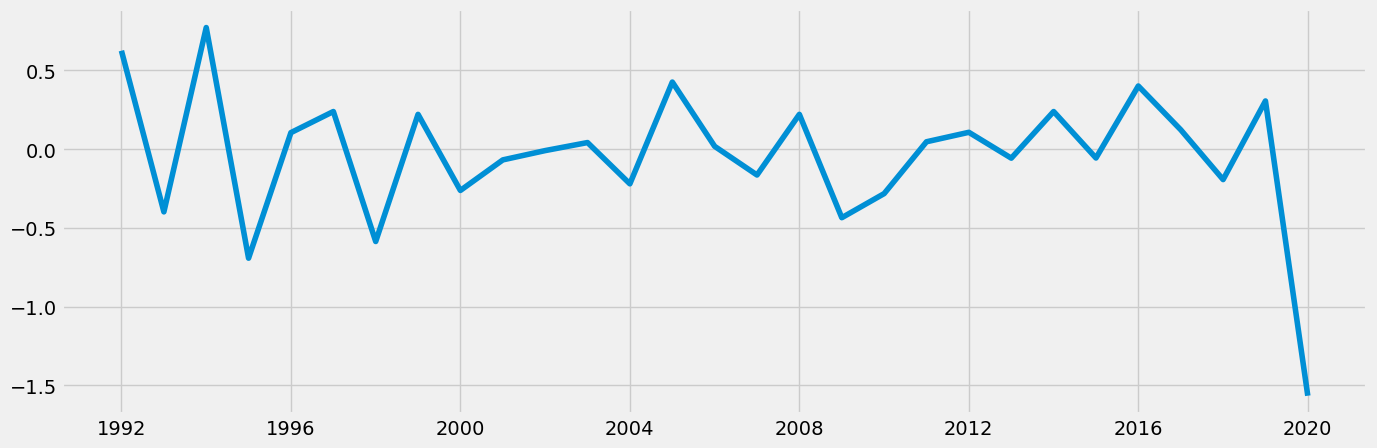

In [17]:
## 1st Data Differencing Did Not Result in Stationary Data, Here is 2nd Attempt

data_diff_2=data_differencing-data_differencing.shift(1)
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_2)

#### Doing Dickey Fuller Test

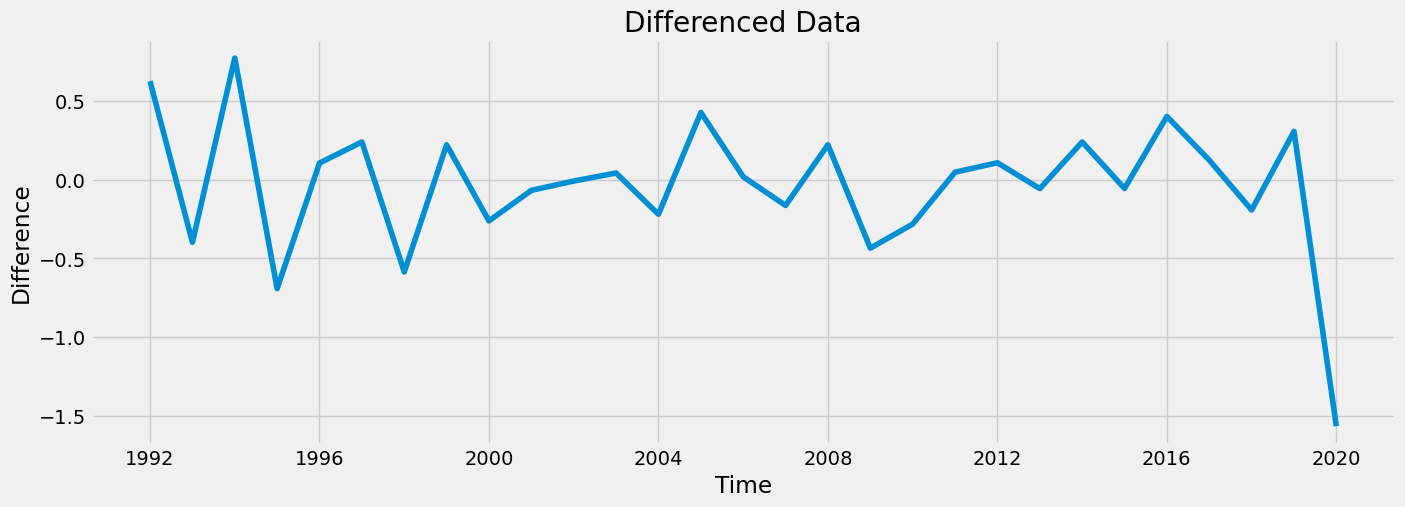

Dickey-Fuller Test Results:
Test Statistic                -7.888932e+00
p-value                        4.490709e-12
Number of Lags Used            0.000000e+00
Number of Observations Used    2.800000e+01
Critical Value (1%)           -3.688926e+00
Critical Value (5%)           -2.971989e+00
Critical Value (10%)          -2.625296e+00
dtype: float64


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(data):
    result = adfuller(data.dropna()) 
    result_series = pd.Series(result[0:4], index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in result[4].items():
        result_series[f'Critical Value ({key})'] = value
    return result_series

data_diff_2 = data_differencing - data_differencing.shift(1)

plt.figure(figsize=(15, 5), dpi=100)
plt.plot(data_diff_2)
plt.title('Differenced Data')
plt.xlabel('Time')
plt.ylabel('Difference')
plt.show()

result = dickey_fuller(data_diff_2)
print("Dickey-Fuller Test Results:")
print(result)


After doing 2 rounds of differencing on the data, the test statistic is less than the Critical Value at a 95 Percent Level of Confidence. This means that the data is stationary.

## Performing Autocorrelation

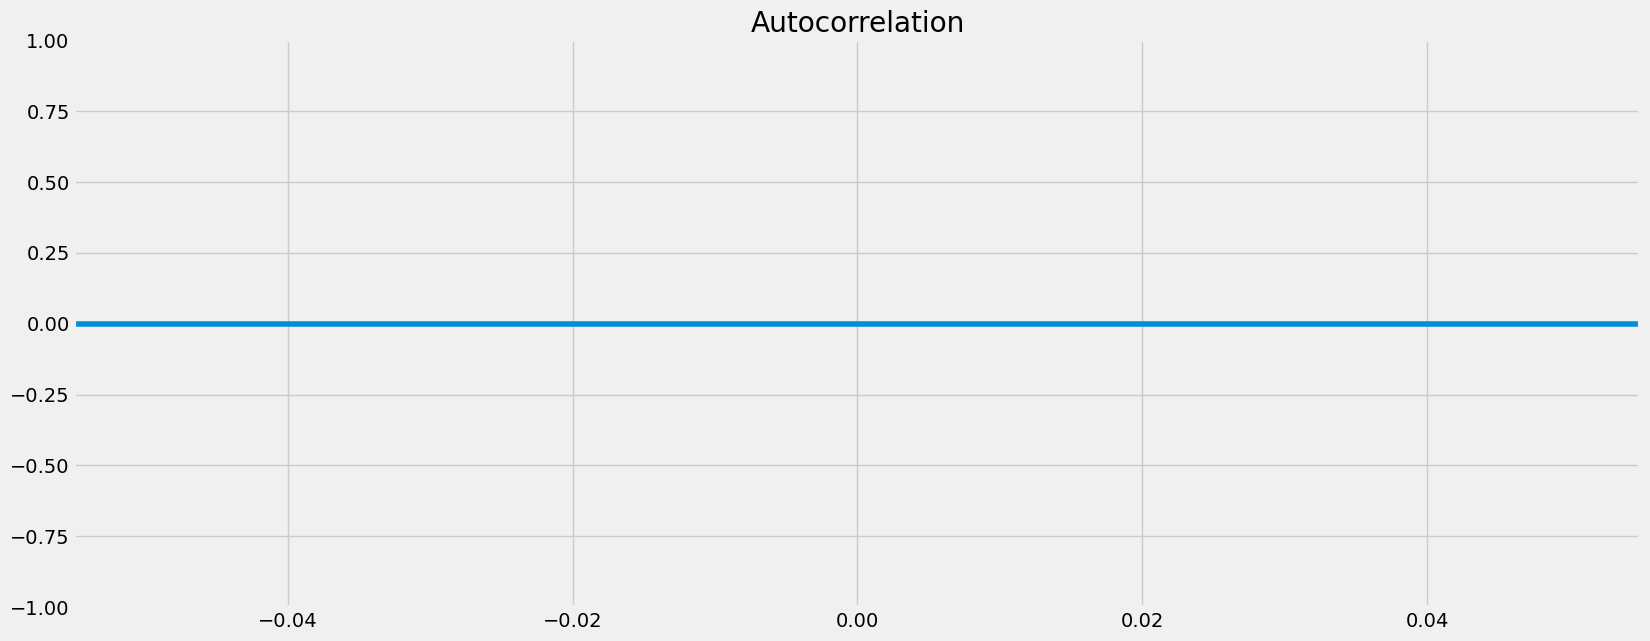

In [23]:
# Autocorrelation 

## Import Autocorrelation Tool
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data_diff_2)
plt.show()

There is no autocorrelation